|Challenge Set 6|
|--------------|
|Name|Jessica Cox|
|Date|August,1 2016|
|Topic|Classification Error|

In [23]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  16773      0  0:00:01  0:00:01 --:--:-- 16793


In [88]:
file = 'house-votes-84.data'
f = pd.read_csv(file, header = None)

In [89]:
columns = ['party', '1', '2', '3', '4', '5', '6', '7', 
          '8', '9', '10', '11', '12', '13', '14', '15',
          '16']

In [90]:
f.columns = columns

In [91]:
f.replace('y', 1, inplace = True)
f.replace('n', 0, inplace = True)
f.replace('republican', 1, inplace = True)
f.replace('democrat', 0, inplace = True)

In [92]:
for col in f.columns[f.columns != 'party']:
    f[col] = f[col].replace('?', np.mean(f[col][f[col] != '?']))

In [93]:
from sklearn.cross_validation import train_test_split

In [94]:
y, X = np.ravel(f[['party']]), f.drop(['party'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=4444)

# Challenge 1  

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
print("Logistic Regression")

model = LogisticRegression()
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


Logistic Regression
Test Data Accuracy:  0.94
Test Precision Score:    0.96
Test Recall Score:    0.89
F1 Score:    0.92


In [100]:
print("KNN = 6")

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


KNN = 6
Test Data Accuracy:  0.93
Test Precision Score:    0.94
Test Recall Score:    0.89
F1 Score:    0.91


In [102]:
print("Gaussian Naive Bayes")

model = GaussianNB()
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


Gaussian Naive Bayes
Test Data Accuracy:  0.94
Test Precision Score:    0.98
Test Recall Score:    0.87
F1 Score:    0.92


In [104]:
print("SVC")

model = SVC()
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


SVC
Test Data Accuracy:  0.95
Test Precision Score:    0.96
Test Recall Score:    0.93
F1 Score:    0.94


In [106]:
print("Decision Tree Classifier")

model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


Decision Tree Classifier
Test Data Accuracy:  0.95
Test Precision Score:    0.96
Test Recall Score:    0.91
F1 Score:    0.93


In [107]:
print("Random Forest Classifier")

model = RandomForestClassifier()
model.fit(X_train, y_train) 

print("Test Data Accuracy:  %0.2f" %(accuracy_score(y_test, model.predict(X_test))))
print("Test Precision Score:    %0.2f" %(precision_score(y_test, model.predict(X_test))))
print("Test Recall Score:    %0.2f" %(recall_score(y_test, model.predict(X_test))))
print("F1 Score:    %0.2f" %(f1_score(y_test, model.predict(X_test))))


Random Forest Classifier
Test Data Accuracy:  0.95
Test Precision Score:    0.98
Test Recall Score:    0.89
F1 Score:    0.93


# Challenge 2

fpr 0.025974025974
tpr 0.888888888889
auc 0.931457431457


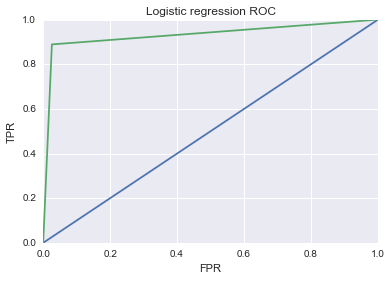

In [133]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic regression ROC')

fpr 0.038961038961
tpr 0.888888888889
auc 0.924963924964


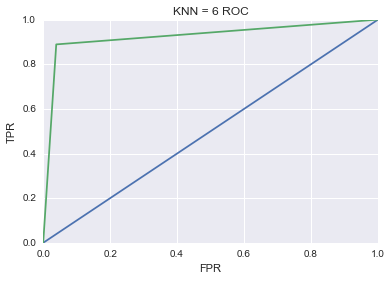

In [135]:
clf = KNeighborsClassifier(n_neighbors=6)
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN = 6 ROC')

fpr 0.012987012987
tpr 0.87037037037
auc 0.928691678692


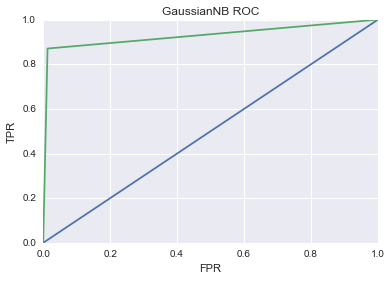

In [136]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GaussianNB ROC')

fpr 0.025974025974
tpr 0.925925925926
auc 0.949975949976


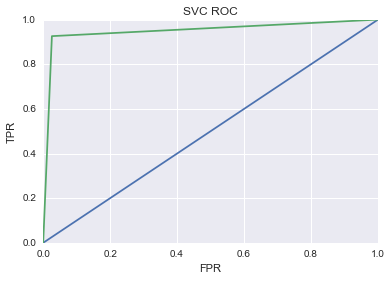

In [137]:
clf = SVC()
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVC ROC')

fpr 0.025974025974
tpr 0.907407407407
auc 0.940716690717


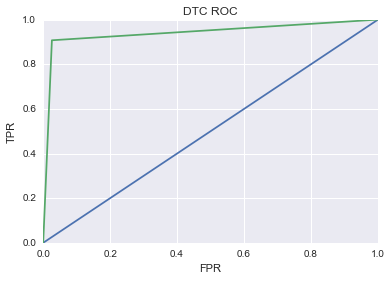

In [138]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DTC ROC')

fpr 0.025974025974
tpr 0.87037037037
auc 0.922198172198


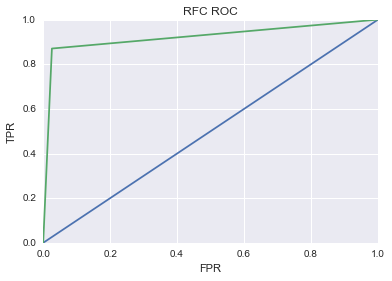

In [139]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, clf.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, clf.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RFC ROC')

# Challenge 3

In [144]:
from sklearn.cross_validation import cross_val_score

model_log = LogisticRegression()
log_cross_score = cross_val_score(model_log, X_train, y_train)
print("Logistic Regression")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

Logistic Regression
Accuracy: 0.923890063425
Precision: 0.912280701754
Recall: 0.907407407407
F1-score: 0.908320084791


In [150]:
model = KNeighborsClassifier(n_neighbors=6)
log_cross_score = cross_val_score(model, X_train, y_train)
print("KNN = 6")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

KNN = 6
Accuracy: 0.885835095137
Precision: 0.847058823529
Recall: 0.888888888889
F1-score: 0.866165413534


In [151]:
model = GaussianNB()
log_cross_score = cross_val_score(model, X_train, y_train)
print("GaussianNB")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

GaussianNB
Accuracy: 0.946617336152
Precision: 0.961622807018
Recall: 0.907407407407
F1-score: 0.932167461579


In [152]:
model = SVC()
log_cross_score = cross_val_score(model, X_train, y_train)
print("SVC")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

SVC
Accuracy: 0.931465821001
Precision: 0.926900584795
Recall: 0.907407407407
F1-score: 0.915827592298


In [153]:
model = DecisionTreeClassifier()
log_cross_score = cross_val_score(model, X_train, y_train)
print("DTC")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

DTC
Accuracy: 0.961945031712
Precision: 0.945304437564
Recall: 0.962962962963
F1-score: 0.944930644931


In [154]:
model = RandomForestClassifier()
log_cross_score = cross_val_score(model, X_train, y_train)
print("RFC")
print("Accuracy:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'accuracy')))
print("Precision:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_test, y_test, scoring = 'f1')))

RFC
Accuracy: 0.924066243834
Precision: 0.905723905724
Recall: 0.925925925926
F1-score: 0.908320084791


# Challenge 4

In [155]:
movies = pd.read_csv('~/ds/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [156]:
movies = movies.dropna()
movies.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00


In [157]:
y, X = np.ravel(movies[['Rating']]), movies.drop(['Rating', 'Title', 'Director', "ReleaseDate"], axis=1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [168]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
pre_acc = precision_score(y_test, model_log.predict(X_test))
rec_acc = recall_score(y_test, model_log.predict(X_test))

print("Pecision score:", pre_acc)
print("Accuracy score:", rec_acc)


Pecision score: 0.411111111111
Accuracy score: 0.444444444444


//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None wil

# Challenge 5

In [169]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0   1427      0  0:00:02  0:00:02 --:--:--  1428


In [183]:
bc = pd.read_csv('data.csv', header = None)
bc.columns = ['age','year','nodes','status']
bc['status'] = bc.status.replace(2, 0)

In [184]:
bc.head(2)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1


In [185]:
y, X = np.ravel(bc[['status']]), bc.drop(['status'], axis=1)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state = 4444)

fpr 0.944444444444
tpr 1.0
auc 0.472222222222


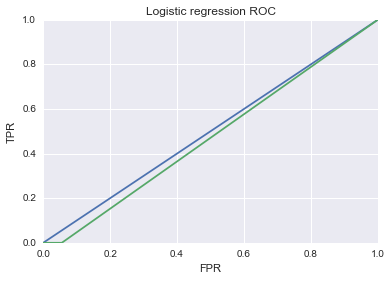

In [188]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
    
print('fpr', metrics.roc_curve(y_test, model_log.predict(X_test))[0][1])
print('tpr', metrics.roc_curve(y_test, model_log.predict(X_test))[1][1])
print('auc', metrics.roc_auc_score(y_test, clf.predict(X_test)))

roc=metrics.roc_curve(y_test,clf.predict(X_test))

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic regression ROC')